# CS421: Introduction to Machine Learning
## Project: Predicting Credit Card Customer Churn
### Performance Evaluation
---

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

y_train = df_train[["attrition_flag"]]
x_train = df_train.drop("attrition_flag", axis=1)

y_test = df_test[["attrition_flag"]]
x_test = df_test.drop("attrition_flag", axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def build_model(model):
    global x_train
    global y_train
    
    smote_sampler = SMOTE(random_state=2021)

    scale_features = x_train.columns[1:]

    scaler = ColumnTransformer(transformers=[ ('scaler', MinMaxScaler(), scale_features) ])

    pipeline = Pipeline(steps = [['scaler', scaler],
                                 ['smote', smote_sampler],
                                 ['classifier', model]])

    pipeline.fit(x_train, y_train.values.ravel() )

    y_pred = pipeline.predict(x_test)
    
    return y_pred

In [7]:
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

def display_metrics(model_name, y_pred):
    print(f"-----------------------PERFORMANCE EVALUATION: {model_name}--------------------  ")
    print(f"Recall: {recall_score(y_test, y_pred)} ")
    print(f"Fbeta2: {fbeta_score(y_test, y_pred, beta=2)} ")
    print(f"AUC Score: {roc_auc_score(y_test, y_pred)} ")
    
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Existing Customer', 'Attrited Customer']

    diagram = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    diagram.plot(cmap=plt.cm.Blues)
    plt.show()

# 1. Logistic Regression

# 2. Support Vector Machine

# 3. RandomForest

-----------------------PERFORMANCE EVALUATION: Random Forest--------------------  
Recall: 0.8584615384615385 
Fbeta2: 0.8323389021479715 
AUC Score: 0.9007181296070186 


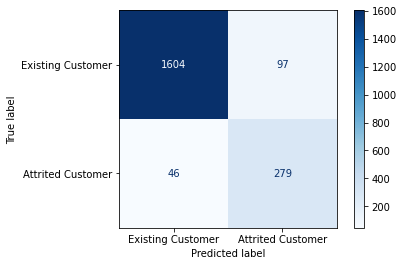

In [5]:
rf_clf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                                    min_samples_split=2, n_estimators=125,
                                    random_state=2021)

rf_ypred = build_model(rf_clf)
display_metrics('Random Forest', rf_ypred)

# 4. XGBoost 

-----------------------PERFORMANCE EVALUATION: XGBoost--------------------  
Recall: 0.8738461538461538 
Fbeta2: 0.8647990255785628 
AUC Score: 0.9198742820965042 


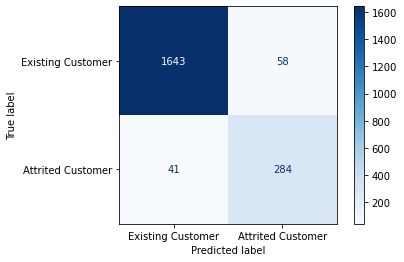

In [8]:
xgb = XGBClassifier(learning_rate=0.25,
                    max_depth=3,
                    gamma=1,
                    subsample=0.9,
                    eval_metric="logloss", 
                    use_label_encoder=False, 
                    random_state=2021)

xgb_ypred = build_model(xgb)
display_metrics("XGBoost", xgb_ypred)